## boston Air bnb dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv("reviews.csv")
calendar.sample(5)

,listing_id,date,available,price
853834,13083058,2017-02-23,f,NaN
564480,13820571,2017-09-04,f,NaN
38556,8923817,2016-11-24,f,NaN
183563,9407895,2016-10-07,f,NaN
423946,14589471,2017-03-07,f,NaN


### data exploration and Cleaning for caleandar dataset 

In [2]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [3]:
calendar.price.isnull().sum()/calendar.shape[0]

0.5087157820748879

- price have nearly 50.87% is missing data and wrong datatype
- listing_id is wrong type as we wouldn't mathmitcal op. with it 

In [4]:
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [5]:
calendar.dropna(subset=['price'],axis=0,inplace=True)
calendar.price.astype(str)
calendar['date']= pd.to_datetime(calendar['date'])

In [6]:
wrangle_prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
calendar.price=calendar.price.apply(wrangle_prices)
calendar['price'].head()


365    65
366    65
367    65
368    75
369    75
Name: price, dtype: object

In [7]:
calendar['price'].head()

365    65
366    65
367    65
368    75
369    75
Name: price, dtype: object

In [8]:
calendar['price'] = pd.to_numeric(calendar['price'])
calendar['listing_id'] =calendar['listing_id'].astype(str)

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
listing_id    643037 non-null object
date          643037 non-null datetime64[ns]
available     643037 non-null object
price         643037 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 24.5+ MB


In [10]:
calendar.describe()

,price
count,643037.000000
mean,198.438909
std,180.142913
min,11.000000
25%,85.000000
50%,150.000000
75%,255.000000
max,7163.000000


### data exploration and Cleaning for  listings Datasets

In [11]:

listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [13]:

l=listings.isnull().sum()/listings.shape[0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(l.sort_values(ascending=False,na_position='first')
)

neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
has_availability                    1.000000
square_feet                         0.984379
monthly_price                       0.752301
weekly_price                        0.751185
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_sco

-  analsyes depend on prices and costs of units so I'm between droping the missing prices raws  or imputing him as unfortunitly can't predict as main featuers to predict like square_feet and etc have high missing data so will focse more in reviwes 

In [14]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [15]:
listings[listings['host_total_listings_count']==749]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
428,12089399,https://www.airbnb.com/rooms/12089399,20160906204935,2016-09-07,Furnished Longwood 1BR Apartment.,Located on the Green Line at the Longwood Medi...,"1 Bed, 1 Bath, Sleeps 3 Longwood Medical Area ...",Located on the Green Line at the Longwood Medi...,none,Major Attractions: •Restaurants – Il Mondo Piz...,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
442,12102482,https://www.airbnb.com/rooms/12102482,20160906204935,2016-09-07,Furnished Longwood 1BR Apartment.,Located on the Green Line at the Longwood Medi...,"1 Bed, 1 Bath, Sleeps 3 Longwood Medical Area ...",Located on the Green Line at the Longwood Medi...,none,Major Attractions: •Restaurants – Il Mondo Piz...,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
443,6744795,https://www.airbnb.com/rooms/6744795,20160906204935,2016-09-07,Furnished Longwood 1BR Apartment,This beautiful apartment is complete with a fu...,NaN,This beautiful apartment is complete with a fu...,none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
455,10153739,https://www.airbnb.com/rooms/10153739,20160906204935,2016-09-07,Lux Furnished 1BR Boston MA Apt.,This beautiful apartment is complete with a fu...,"1 Bed, 1 Bath, Sleeps 3 Longwood Medical Area ...",This beautiful apartment is complete with a fu...,none,Major Attractions: •Restaurants – Il Mondo Piz...,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
468,8184662,https://www.airbnb.com/rooms/8184662,20160906204935,2016-09-07,Furnished Longwood 1BR Apartment.,This beautiful apartment is complete with a fu...,B(PHONE NUMBER HIDDEN),This beautiful apartment is complete with a fu...,none,This property is located on the Green Line at ...,...,2.0,f,NaN,NaN,f,strict,f,f,136,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,10052824,https://www.airbnb.com/rooms/10052824,20160906204935,2016-09-07,Lux. 3 BR Apt Near Fort Point,Luxury high-rise apt. with unparalleled amenit...,Our luxury high-rise apt. is conveniently loca...,Luxury high-rise apt. with unparalleled amenit...,none,NaN,...,10.0,f,NaN,NaN,f,strict,f,f,136,0.21
3075,10052622,https://www.airbnb.com/rooms/10052622,20160906204935,2016-09-07,Lux. 3 BR Apt. - Financial District,Luxury high-rise apt. with unparalleled amenit...,Our luxury high-rise apt. is conveniently loca...,Luxury high-rise apt. with unparalleled amenit...,none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
3078,10052920,https://www.airbnb.com/rooms/10052920,20160906204935,2016-09-07,Lux. 3BR by the Seaport & Harbor,Luxury high-rise apt. with unparalleled amenit...,Our luxury high-rise apt. is conveniently loca...,Luxury high-rise apt. with unparalleled amenit...,none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
3081,10051623,https://www.airbnb.com/rooms/10051623,20160906204935,2016-09-07,Lux 2BR In Seaport Square on Harbor,Luxury high-rise apt. with unparalleled amenit...,Our luxury high-rise apt. is conveniently loca...,Luxury high-rise apt. with unparalleled amenit...,none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN


In [16]:
listings.dropna(subset=['review_scores_rating','price','review_scores_value'],axis=0,inplace=True)

In [17]:
listings.drop(['jurisdiction_names','license','has_availability','square_feet','neighbourhood_group_cleansed'],axis=1,inplace=True )

In [18]:
l=listings.isnull().sum()/listings.shape[0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(l.sort_values(ascending=False,na_position='first')
)

monthly_price                       0.714803
weekly_price                        0.703945
security_deposit                    0.595367
notes                               0.498009
interaction                         0.373507
access                              0.348172
neighborhood_overview               0.344915
transit                             0.312342
host_about                          0.311980
cleaning_fee                        0.286283
house_rules                         0.266377
space                               0.242852
medium_url                          0.171915
xl_picture_url                      0.171915
thumbnail_url                       0.171915
neighbourhood                       0.145856
host_neighbourhood                  0.088310
host_acceptance_rate                0.078538
host_response_time                  0.078538
host_response_rate                  0.078538
summary                             0.045603
zipcode                             0.009048
bathrooms 

In [19]:
listings[listings['host_total_listings_count']==749]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
468,8184662,https://www.airbnb.com/rooms/8184662,20160906204935,2016-09-07,Furnished Longwood 1BR Apartment.,This beautiful apartment is complete with a fu...,B(PHONE NUMBER HIDDEN),This beautiful apartment is complete with a fu...,none,This property is located on the Green Line at ...,...,4.0,10.0,2.0,f,f,strict,f,f,136,0.22
488,7868931,https://www.airbnb.com/rooms/7868931,20160906204935,2016-09-07,Furnished Longwood 1-BR Apartment,Located on the Green Line at the Longwood Medi...,"1 Bed, 1 Bath, Sleeps 3 Longwood Medical Area ...",Located on the Green Line at the Longwood Medi...,none,Major Attractions: •Restaurants – Il Mondo Piz...,...,10.0,10.0,7.0,f,f,strict,f,f,136,0.16
556,12303347,https://www.airbnb.com/rooms/12303347,20160906204935,2016-09-07,Luxury Furnished 1BR Boston Apt,At the intersection of the charming Leather Di...,"1 Bed, 1 Bath, Sleeps 3 A distinctive presence...",At the intersection of the charming Leather Di...,none,Major Attractions: •Rose Kennedy Greenway – pu...,...,10.0,10.0,8.0,f,f,flexible,f,f,136,0.54
572,10611728,https://www.airbnb.com/rooms/10611728,20160906204935,2016-09-07,LUX 1 Bedroom Downtown Boston Apt,"Our stunning apt. features oversized windows, ...","1 Bed, 1 Bath, Sleeps 3 A distinctive presence...","Our stunning apt. features oversized windows, ...",none,Major Attractions: •Rose Kennedy Greenway – pu...,...,10.0,10.0,10.0,f,f,strict,f,f,136,0.27
575,12302222,https://www.airbnb.com/rooms/12302222,20160906204935,2016-09-07,Luxury 2BR Boston Apt,At the intersection of the charming Leather Di...,"1 Bed, 1 Bath, Sleeps 3 A distinctive presence...",At the intersection of the charming Leather Di...,none,Major Attractions: •Rose Kennedy Greenway – pu...,...,10.0,10.0,8.0,f,f,strict,f,f,136,0.77
579,12383204,https://www.airbnb.com/rooms/12383204,20160906204935,2016-09-07,Dowtown Boston 2BR Apt.-Opera House,Our beautifully furnished apartment is complet...,"2 Bed, 2 Bath, Sleeps 5 This apartment is perf...",Our beautifully furnished apartment is complet...,none,Major Attractions: •Restaurants – The Q Restau...,...,10.0,8.0,8.0,f,f,strict,f,f,136,0.58
589,10116726,https://www.airbnb.com/rooms/10116726,20160906204935,2016-09-07,Dowtown Boston 1BR Apt-Logan Airprt,This beautifully furnished apartment is comple...,"1 Bed, 1 Bath, Sleeps 3 This apartment is perf...",This beautifully furnished apartment is comple...,none,Major Attractions: •Restaurants – The Q Restau...,...,8.0,8.0,8.0,f,f,strict,f,f,136,0.14
599,10116429,https://www.airbnb.com/rooms/10116429,20160906204935,2016-09-07,Dowtown Boston 1BR Apt.+Indoor Pool,This beautifully furnished apartment is comple...,"1 Bed, 1 Bath, Sleeps 3 This apartment is perf...",This beautifully furnished apartment is comple...,none,Major Attractions: •Restaurants – The Q Restau...,...,8.0,10.0,10.0,f,f,strict,f,f,136,0.13
611,10116601,https://www.airbnb.com/rooms/10116601,20160906204935,2016-09-07,Dowtown Boston 1BR Apt+Indoor Pool,This beautifully furnished apartment is comple...,"1 Bed, 1 Bath, Sleeps 3 This apartment is perf...",This beautifully furnished apartment is comple...,none,Major Attractions: •Restaurants – The Q Restau...,...,10.0,10.0,10.0,f,f,strict,f,f,136,0.20
624,10117329,https://www.airbnb.com/rooms/10117329,20160906204935,2016-09-07,LUX Boston 2BR Apt. Logan Airport,This beautifully furnished apartment is comple...,"1 Bed, 1 Bath, Sleeps 3 This apartment is perf...",This beautifully furnished apartment is comple...,none,Major Attractions: •Restaurants – The Q Restau...,...,10.0,10.0,10.0,f,f,strict,f,f,136,0.25


In [20]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.763000e+03,2.763000e+03,2.763000e+03,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2751.000000,2756.000000,...,2763.000000,2763.000000,2759.000000,2762.000000,2762.000000,2762.000000,2761.000000,2763.000000,2763.000000,2763.000000
mean,7.629217e+06,2.016091e+13,2.289688e+07,42.852696,42.852696,42.339191,-71.083699,3.062251,1.215558,1.251089,...,24.682591,91.922910,9.431678,9.258146,9.645909,9.647357,9.413618,9.169381,10.105682,2.007097
std,4.382781e+06,8.360888e-01,2.191961e+07,139.838053,139.838053,0.024983,0.031696,1.823621,0.500063,0.767830,...,38.771199,9.531391,0.931846,1.169289,0.763078,0.734745,0.903626,1.009500,23.669636,2.131826
min,3.353000e+03,2.016091e+13,4.240000e+03,1.000000,1.000000,42.235942,-71.171469,1.000000,0.000000,0.000000,...,1.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.020000
25%,4.080424e+06,2.016091e+13,5.235073e+06,1.000000,1.000000,42.326383,-71.104995,2.000000,1.000000,1.000000,...,3.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.500000
50%,7.708436e+06,2.016091e+13,1.670821e+07,2.000000,2.000000,42.344835,-71.077165,2.000000,1.000000,1.000000,...,10.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.240000
75%,1.175731e+07,2.016091e+13,3.295588e+07,7.000000,7.000000,42.355030,-71.061670,4.000000,1.000000,1.000000,...,29.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.484378e+07,2.016091e+13,9.287818e+07,749.000000,749.000000,42.389982,-71.000100,16.000000,6.000000,5.000000,...,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


In [21]:
list(listings.columns) 

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'mont

In [22]:
selected_columns = ['id','accommodates','bathrooms',
                     'bedrooms','beds','price','number_of_reviews',
                     'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value','neighbourhood']

In [23]:
listings=listings[selected_columns]
listings.head()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood
1,3075044,2,1.0,1.0,1.0,$65.00,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,Roslindale
2,6976,2,1.0,1.0,1.0,$65.00,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,Roslindale
3,1436513,4,1.0,1.0,2.0,$75.00,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN
4,7651065,2,1.5,1.0,2.0,$79.00,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,Roslindale
5,12386020,2,1.0,1.0,1.0,$75.00,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,Roslindale


In [41]:
wrangle_prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
listings['price']=listings['price'].apply(wrangle_prices)
listings['price'] = pd.to_numeric(listings['price'])

listings.head()

,listing_id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood
1,3075044,2,1.0,1.0,1.0,65,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,Roslindale
2,6976,2,1.0,1.0,1.0,65,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,Roslindale
3,1436513,4,1.0,1.0,2.0,75,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN
4,7651065,2,1.5,1.0,2.0,79,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,Roslindale
5,12386020,2,1.0,1.0,1.0,75,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,Roslindale


### data exploration and Cleaning for reviews Datasets

In [42]:
pd.reset_option('all')



: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [43]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [44]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null object
id               68275 non-null object
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(1), object(5)
memory usage: 3.1+ MB


In [45]:
reviews.describe()


,reviewer_id
count,6.827500e+04
mean,2.802389e+07
std,2.234097e+07
min,1.430000e+02
25%,9.001346e+06
50%,2.305179e+07
75%,4.213454e+07
max,9.335034e+07


In [46]:
listings.rename(columns={"id": "listing_id"},inplace=True)


In [47]:
listings['listing_id']=listings['listing_id'].astype(str)

In [48]:
reviews[['listing_id','id']]=reviews[['listing_id','id']].astype(str)

In [49]:
df_clean=pd.merge(listings,reviews,on='listing_id',how='inner' )

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68198 entries, 0 to 68197
Data columns (total 20 columns):
listing_id                     68198 non-null object
accommodates                   68198 non-null int64
bathrooms                      67433 non-null float64
bedrooms                       68012 non-null float64
beds                           68085 non-null float64
price                          68198 non-null int64
number_of_reviews              68198 non-null int64
review_scores_rating           68198 non-null float64
review_scores_accuracy         68194 non-null float64
review_scores_cleanliness      68197 non-null float64
review_scores_checkin          68197 non-null float64
review_scores_communication    68197 non-null float64
review_scores_location         68195 non-null float64
review_scores_value            68198 non-null float64
neighbourhood                  60702 non-null object
id                             68198 non-null object
date                           68198

## data explantions
 
     

what is Boston's Hosts revenue forcast during year  ?

In [51]:
calendar

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65,2017-08
366,3075044,2017-08-21,t,65,2017-08
367,3075044,2017-08-20,t,65,2017-08
368,3075044,2017-08-19,t,75,2017-08
369,3075044,2017-08-18,t,75,2017-08
...,...,...,...,...,...
1308875,14504422,2016-09-20,t,62,2016-09
1308876,14504422,2016-09-19,t,62,2016-09
1308877,14504422,2016-09-18,t,62,2016-09
1308878,14504422,2016-09-17,t,62,2016-09


In [52]:
calendar['month'] = pd.to_datetime(calendar['date']).dt.to_period('M')

calendar.groupby('month')['price'].sum()

month
2016-09     6165579
2016-10    10817676
2016-11    11949813
2016-12    11748139
2017-01    11549466
2017-02    10280396
2017-03    10032940
2017-04    10135248
2017-05    10382979
2017-06    10363503
2017-07    11129255
2017-08    11297226
2017-09     1751341
Freq: M, Name: price, dtype: int64

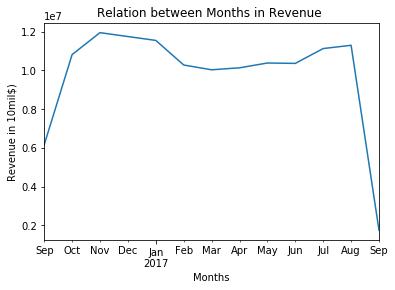

In [79]:
calendar['month'] = pd.to_datetime(calendar['date']).dt.to_period('M')
calendar.groupby('month')['price'].sum().plot.line();
plt.ylabel('Revenue in 10mil$)');
plt.xlabel('Months');
plt.title('Relation between Months in Revenue ');

> Findings 1
#### we can follow Relation between Months in Revenue to :
>Boston Travel Seasons

- High (May-October): Late spring through early fall sees hardly any slow times in Boston. May, June, and September are busy with college graduations and move-ins. Surprisingly, October is the most expensive month to visit, when the city fills up with visitors for fall foliage, the regatta, and Halloween in Salem. June through August are peak travel months for families, with July seeing the highest volume of tourists. Expect high rates at hotels all summer, along with queues and crowds at popular attractions. Make your reservations early.

- Low (November-February): Fewer visitors head to Boston during these cold months, so there are plenty of deals to be had on flights and hotels. November is the exception to this; though there are less travelers, hotel rates are still high since this is a popular month for conventions. Overall, if cold and snow don’t bother you, there are plenty of fantastic deals to be had along with less crowded attractions.

- Shoulder (March-April): Weather can be iffy during these months, sometimes snowy, often rainy, and still fairly chilly most of the time. Dress in layers, and enjoy the seasonal attractions that are just beginning to re-open now, but do plan for a few rainy day museum visits.


### Are listing's price effected it's frequency use ?

In [95]:
df_clean[df_clean['price']<200].shape[0]/df_clean.shape[0]

0.7903164315669081

house average rental price is 147.20012317076748


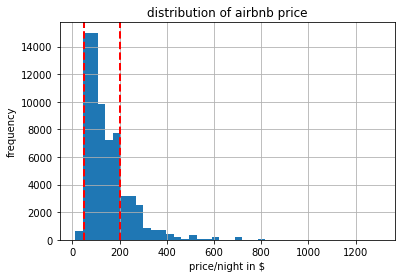

In [94]:
# price distribution
df_clean['price'].hist(bins=40)
plt.title('distribution of airbnb price')
plt.xlabel('price/night in $')
plt.ylabel('frequency')
mean = df_clean['price'].mean()
plt.axvline(200, color='r', linestyle='dashed', linewidth=2)
print(f'house average rental price is {mean}')
plt.axvline(50, color='r', linestyle='dashed', linewidth=2)


>Finding 2
- it show here that 61% of uses was for listings under avarge cost of night in boston and there dramtic lack of uses after the listing price go over 200dollar per night as 80% of uses was under 200dollar per night and highest demand is between 50~105 dollar per night

##  How much users are satisfaed with lisitngs's price and what they paying  ? 

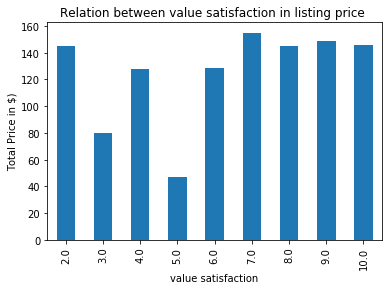

In [107]:
df_clean.groupby('review_scores_value')['price'].mean().plot.bar();
plt.ylabel('Total Price in $)');
plt.xlabel('value satisfaction');
plt.title('Relation between value satisfaction in listing price ');

>Finding 3
- it doesn't show an oblivious Rating trend but show imp. quality it's not about the who much they pay it about having great experience in the exchange 